In [1]:
import pandas as pd
import numpy as np

from dill import load as dill_load
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

RANDOM_STATE = 404

In [2]:
model = load_model('classifier\model.h5', compile = False)

scalerFile = "classifier\scaler.pkl"
with open(scalerFile, "rb") as f:
    scaler = dill_load(f)

df = pd.read_csv('data/HAD.csv', sep = ',')
#pdb.set_trace()

# X is your features, y is your target column
X_raw, y_raw = df.iloc[:, :-2], df.iloc[:, -2]

X = X_raw.astype('float').astype('int')
y_typed = y_raw.astype('float').astype('int')

y = LabelEncoder().fit_transform(y_typed)

X_array = np.asarray(X, dtype=float)
X_scaled = scaler.preprocess_clinical_data(X_array)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

raw_model_probs = model.predict(X_test)

print(raw_model_probs)


8/8 [==============================] - 0s 3ms/step
[[0.26591983 0.28640813 0.20631754 ... 0.06179727 0.03625624 0.02194217]
 [0.54484105 0.31747767 0.08414526 ... 0.00991326 0.00742704 0.00388667]
 [0.01270544 0.03230309 0.04556761 ... 0.17092814 0.23698203 0.32576057]
 ...
 [0.43850103 0.350602   0.13629599 ... 0.01585079 0.01285526 0.0068993 ]
 [0.10861513 0.15183064 0.17928553 ... 0.1062257  0.11923715 0.14485972]
 [0.18618524 0.19022244 0.15979232 ... 0.13383508 0.09952458 0.07008042]]


In [3]:
model = load_model('classifier\model.h5', compile = False)
scalerFile = "classifier\scaler.pkl"

with open(scalerFile, "rb") as f:
    scaler = dill_load(f)

X_raw = pd.read_csv('data\HAD_after_imputer.csv', sep = ',')

y_raw = pd.read_csv('data\HAD_target.csv', sep = ',')
y = LabelEncoder().fit_transform(y_raw.values.ravel())

X_raw

,AGE,SEX_F,NIHSS_BL,SYS_BLOOD_PRESSURE,PREV_MRS,ORAL_ANTICOAGULANT,HYPERTENSION,HYPERCHOL,ISCH_HEART,SMOKING,...,PREV_MRS_MISSING,ASPECTS_MISSING,CTA_CS_MISSING,ONSET_TO_ADMISSION_MISSING,ONSET_TO_IMAGING_MISSING,ONSET_TO_TPA_MISSING,ONSET_TO_GROIN_MISSING,SERUM_GLUCOSE,SERUM_GLUCOSE_MISSING,VALV_HEART
0,0.000972,-0.908801,-0.870588,-0.089710,-0.641768,-0.370094,0.674720,0.991543,-0.660934,1.867007,...,0,0,1,0,0,0,1,-1,1,-1
1,-1.053091,-0.908801,-0.513781,-0.323477,1.622132,-0.370094,0.674720,0.991543,-0.660934,-0.535617,...,0,0,1,0,0,0,1,-1,1,-1
2,0.211784,-0.908801,-0.870588,0.767434,-0.641768,2.702015,0.674720,0.991543,-0.660934,-0.535617,...,0,1,1,1,1,1,1,-1,1,-1
3,0.773951,-0.908801,-0.038039,-0.089710,-0.641768,-0.370094,0.674720,-1.008529,1.513010,-0.535617,...,0,1,1,0,0,0,1,-1,1,-1
4,0.773951,1.100351,0.080897,-0.089710,-0.641768,-0.370094,0.674720,0.991543,-0.660934,-0.535617,...,0,0,1,0,0,0,1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.071243,-0.908801,-0.870588,-0.089710,-0.641768,-0.370094,-1.482097,-1.008529,-0.660934,-0.535617,...,0,0,1,0,0,0,1,-1,1,-1
940,-0.490924,-0.908801,-0.870588,-0.323477,1.622132,-0.370094,0.674720,-1.008529,-0.660934,-0.535617,...,0,0,1,1,0,0,1,-1,1,-1
941,-0.631466,1.100351,-1.227395,-1.804000,-0.641768,-0.370094,0.674720,-1.008529,-0.660934,-0.535617,...,0,1,1,1,1,1,1,-1,1,-1
942,0.703680,1.100351,0.199833,-0.089710,-0.641768,-0.370094,0.674720,0.991543,-0.660934,-0.535617,...,0,0,0,0,0,1,0,-1,1,-1


In [4]:
from sklearn.model_selection import train_test_split

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=RANDOM_STATE)

raw_model_probs = model.predict(X_test)

raw_model_probs

6/6 [==============================] - 0s 3ms/step


array([[0.0000000e+00, 9.7861501e-37, 1.3840155e-08, ..., 1.1209451e-03,
        5.1809869e-13, 7.4607136e-15],
       [0.0000000e+00, 0.0000000e+00, 1.7764014e-10, ..., 6.4668484e-02,
        2.4129641e-11, 1.5718357e-11],
       [0.0000000e+00, 8.2212399e-36, 2.0024176e-07, ..., 3.1799532e-03,
        7.6502864e-14, 4.1791153e-15],
       ...,
       [1.9898464e-01, 7.9402423e-01, 6.8348506e-03, ..., 5.9187607e-07,
        1.2231509e-08, 5.5044075e-10],
       [0.0000000e+00, 0.0000000e+00, 2.4093369e-10, ..., 3.4232731e-03,
        1.2837584e-12, 7.6136554e-12],
       [8.1353396e-02, 4.0403894e-01, 6.4220183e-02, ..., 1.7342938e-02,
        1.1445689e-01, 1.1503311e-01]], dtype=float32)

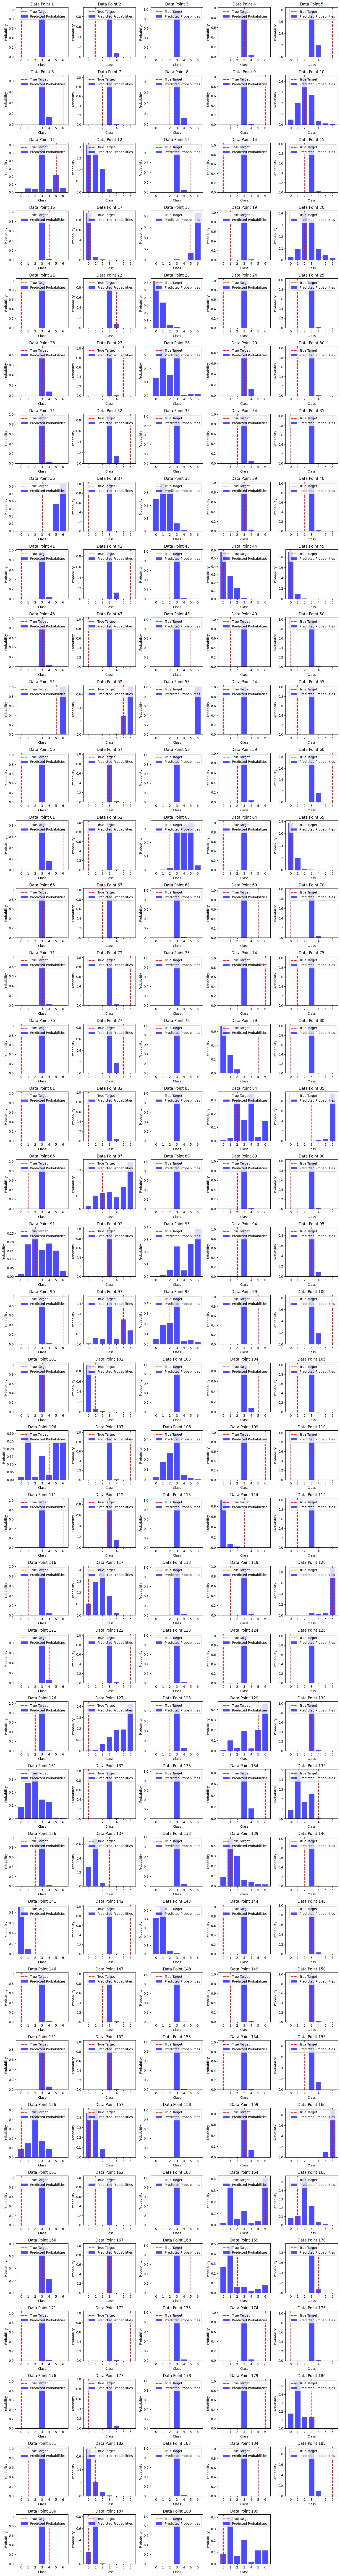

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of samples to visualize
num_samples = len(X_test)

# Set the figure size based on the number of samples
plt.figure(figsize=(15, 3 * num_samples//5))

for i in range(num_samples):
    # Extract probabilities for the current data point
    probs = raw_model_probs[i]

    # Extract the true target value for the current data point
    true_target = y_test[i]

    # Generate a list of class labels (assuming they are encoded as integers)
    class_labels = np.arange(len(probs))

    # Plot a stacked bar chart for the current data point
    plt.subplot(num_samples//5 + 1, 5, i+1)
    plt.bar(class_labels, probs, color='blue', alpha=0.7, label='Predicted Probabilities')
    plt.axvline(x=true_target, color='red', linestyle='--', linewidth=2, label='True Target')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title(f'Data Point {i+1}')
    plt.xticks(class_labels)
    plt.legend()

plt.tight_layout()
plt.savefig('images/classification/HAD.png')
plt.show()